In [9]:
%pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


### Importando pacotes

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Criando Antecedent e Consequent

In [11]:
# universe = np.arange(0, 11, 1)

quality = ctrl.Antecedent(np.arange(0, 11, 1), "quality")
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")

# universe = np.arange(0, 26, 1)

tip = ctrl.Consequent(np.arange(0, 26, 1), "tip")

quality.automf(3)
service.automf(3)

tip["low"] = fuzz.trimf(tip.universe, [0, 0, 13])
tip["medium"] = fuzz.trimf(tip.universe, [0, 13, 25])
tip["high"] = fuzz.trimf(tip.universe, [13, 25, 25])

c:\Users\Pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


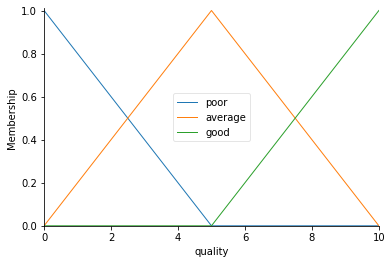

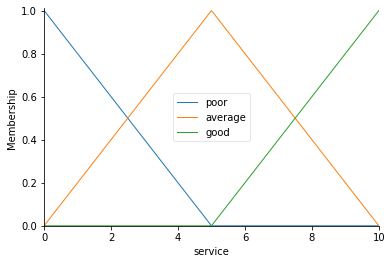

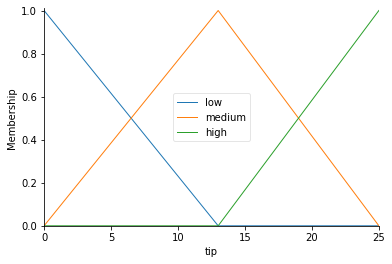

In [12]:
quality.view()
service.view()
tip.view()

### Criando Regras

In [13]:
rule1 = ctrl.Rule(service["poor"] | quality["poor"], tip["low"])
rule2 = ctrl.Rule(service["average"], tip["medium"])
rule3 = ctrl.Rule(service["good"] | quality["good"], tip["high"])

### Criando Sistema

In [14]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [15]:
tipping.input["quality"] = 6
tipping.input["service"] = 4

tipping.compute()

12.632462877624171


c:\Users\Pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


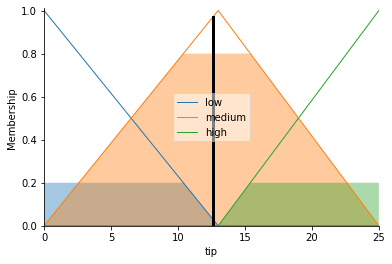

In [16]:
print(tipping.output["tip"])
tip.view(sim=tipping)
